# Ellipses from binary masks

Steps to reproduce Elliptical Gaussian Bounding Box:

1. Transform binary mask into Gaussian Bounding Box
2. Train oriented object detector using ProbIoU
3. Convert detection to an ellipse during inference (EGBB)

## Binary mask to Gaussian Bounding Box

In [1]:
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
from skimage.io import imread

%matplotlib inline

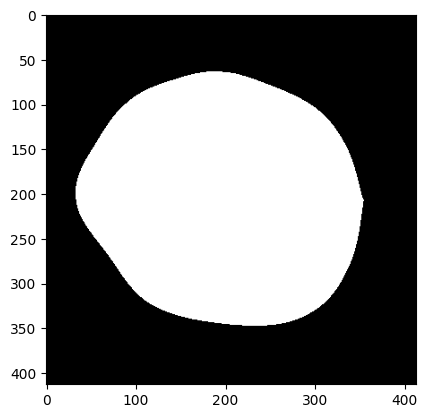

In [2]:
image = imread('img/r1_Im121-1-Disc-T.png')
plt.imshow(image, cmap=cm.gray)
plt.show()

In [3]:
label_img = label(image)
regions = regionprops(label_img)

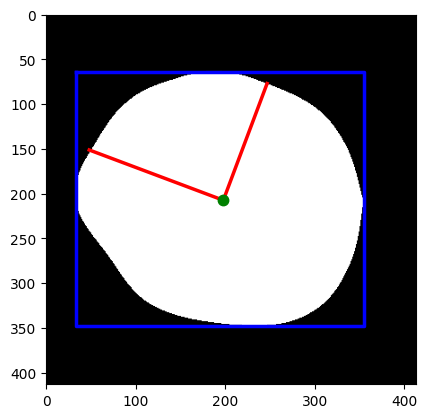

In [4]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

width, height = image.shape[0], image.shape[1]

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, width, height, 0))
plt.show()

In [5]:
print(f'centroid: {x0}, {y0}')

centroid: 198.02820567832367, 207.3659443610098


In [13]:
binary = image.copy()
y,x = np.where(binary == 255)
covariance = np.cov(y,x)


In [14]:
covariance

array([[5043.38287487,  509.33787736],
       [ 509.33787736, 6210.49424119]])

In [18]:
mean_vector = (np.mean(y), np.mean(x))

In [19]:
mean_vector

(207.3659443610098, 198.02820567832367)